# Exercises

## 1. Sampling uniformly on a disk

Consider the following probability distribution:

\begin{align*}
p(x, y) = \frac{1}{\pi} \mathbb{1}_{x^2 + y^2 \leq 1}(x, y),
\end{align*}

where $\mathbb{1}_{x^2 + y^2 \leq 1}$ is the indicator function of the disk of radius 1 centered at the origin.

- Using a **transformation method**, develop a sampler for this distribution.

**Hint**: Consider sampling a radius and an angle - and convert them to Cartesian coordinates. The most obvious choice may not work!

- After the transformation method, implement the usual rejection sampling method to sample from the disk.

- Sample from $x$-marginal of this distribution. Plot the histogram of the samples.

## 2. Monte Carlo Integration

Consider the following integral:
\begin{align*}
I = \int_0^1 (1 - x^2)^{1/2} \mathrm{d} x.
\end{align*}
Take the sampling distribution as uniform on $[0,1]$. Build the Monte Carlo estimate for varying $N$ and compute the mean and the variance, i.e., for $\varphi(x) = (1 - x^2)^{1/2}$ and given $X_1, \ldots, X_N$ from $\text{Unif}(0,1)$, compute

\begin{align}
\hat{\varphi}^N = \frac{1}{N} \sum_{i=1}^N \varphi(X_i)
\end{align}
and the empirical variance
\begin{align}
\widehat{\textsf{var}}[\hat{\varphi}^N] = \frac{1}{N^2} \sum_{i=1}^N (\varphi(X_i) - \hat{\varphi}^N)^2.
\end{align}
Discuss the difference between this empirical estimator vs. the correct one for the variance (using the true value). Plot your mean estimates \eqref{eq:mean_estimates}, standard deviation estimates (by taking the square root of \eqref{eq:variance_est}), and the true value $I = \pi/4$. Can you always trust the variance estimates? Here is a code snippet for this one:

(0.0, 10000.0)

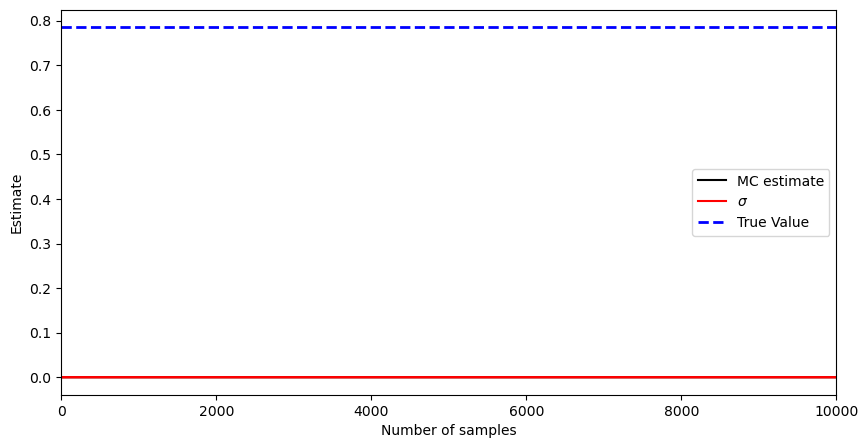

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x):
    return np.sqrt((1 - x**2))

I = np.pi / 4 # true value

N_max = 10000 # go up to 10,000 samples

U = np.random.uniform(0, 1, N_max)
I_est = np.zeros(N_max - 1) # this is longer than we need
I_var = np.zeros(N_max - 1)

fig = plt.figure(figsize=(10, 5))

k = 0

K = np.array([])

# We are not computing for every N for efficiency

for N in range(1, N_max, 5):

    I_est[k] = 0 # Your mean estimate here
    I_var[k] = 0 # Your variance estimate here

    k = k + 1 # We index estimators with k as we jump N by 5
    K = np.append(K, N)

plt.plot(K, I_est[0:k], 'k-', label='MC estimate')
plt.plot(K, I_est[0:k] + np.sqrt(I_var[0:k]), 'r', label=r'$\sigma$', alpha=1)
plt.plot(K, I_est[0:k] - np.sqrt(I_var[0:k]), 'r', alpha=1)
plt.plot([0, N_max], [I, I], 'b--', label='True Value', alpha=1, linewidth=2)
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Estimate')
plt.xlim([0, N_max])

## 3. Importance Sampling



Implement the importance sampling method for estimating
\begin{align*}
\mathbb{P}(X > 4),
\end{align*}
where $X\sim \mathcal{N}(0,1)$. Try two methods: (i) Standard Monte Carlo integration by drawing i.i.d samples from $\mathbb{P}$ and (ii) importance sampling. What kind of proposals should you choose? What is a good criterion for this example? Choose different proposals and test their efficiency in terms of getting a low relative error vs. samples.